In [67]:
#Intalación
!pip install lazypredict

     -------------------------------------- 124.9/124.9 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00


Impotaremos las bibliotecas

In [109]:
#@title Importando las bibliotecas
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [93]:
df = pd.read_csv('nba_logreg2.csv', sep =';')

In [94]:
df.shape

(1329, 21)

In [95]:
#@title Primeros Registros
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.40,7.40,2.60,7.60,34.70,0.50,2.10,25.00,...,2.30,69.90,0.70,3.40,4.10,1.90,0.40,0.40,1.30,0.00
1,Andrew Harrison,35,26.90,7.20,2.00,6.70,29.60,0.70,2.80,23.50,...,3.40,76.50,0.50,2.00,2.40,3.70,1.10,0.50,1.60,0.00
2,JaKarr Sampson,74,15.30,5.20,2.00,4.70,42.20,0.40,1.70,24.40,...,1.30,67.00,0.50,1.70,2.20,1.00,0.50,0.30,1.00,0.00
3,Malik Sealy,58,11.60,5.70,2.30,5.50,42.60,0.10,0.50,22.60,...,1.30,68.90,1.00,0.90,1.90,0.80,0.60,0.10,1.00,1.00
4,Matt Geiger,48,11.50,4.50,1.60,3.00,52.40,0.00,0.10,0.00,...,1.90,67.40,1.00,1.50,2.50,0.30,0.30,0.40,0.80,1.00


In [96]:
dfsim = df.drop('Name',axis = 1)

In [102]:
#@title Seleccionar columnas relevantes
y = dfsim['TARGET_5Yrs']

In [103]:
X = dfsim.drop(columns = 'TARGET_5Yrs')

In [104]:
# Segmentación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [105]:
# Instanciar modelo
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [110]:
#Entrenado los modelos de regresión
models, predictions = LazyClassifier().fit(X_train_std, X_test_std, y_train, y_test)

100%|██████████| 29/29 [00:05<00:00,  5.67it/s]

[LightGBM] [Info] Number of positive: 657, number of negative: 406
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1723
[LightGBM] [Info] Number of data points in the train set: 1063, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.618062 -> initscore=0.481331
[LightGBM] [Info] Start training from score 0.481331


Aplicación LazyClassifier

In [111]:
models[:10]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.71,0.70,0.70,0.71,0.04
BernoulliNB,0.69,0.70,0.70,0.69,0.06
PassiveAggressiveClassifier,0.69,0.69,0.69,0.70,0.03
NearestCentroid,0.67,0.69,0.69,0.67,0.06
RidgeClassifierCV,0.73,0.68,0.68,0.72,0.04
RidgeClassifier,0.73,0.68,0.68,0.72,0.05
LinearSVC,0.72,0.68,0.68,0.71,0.15
LogisticRegression,0.72,0.68,0.68,0.71,0.09
CalibratedClassifierCV,0.72,0.68,0.68,0.71,0.50


El código models[:10] es una forma eficiente de seleccionar una sublista de los primeros 10 elementos de la lista models.

In [112]:
predictions[:10]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.71,0.70,0.70,0.71,0.04
BernoulliNB,0.69,0.70,0.70,0.69,0.06
PassiveAggressiveClassifier,0.69,0.69,0.69,0.70,0.03
NearestCentroid,0.67,0.69,0.69,0.67,0.06
RidgeClassifierCV,0.73,0.68,0.68,0.72,0.04
RidgeClassifier,0.73,0.68,0.68,0.72,0.05
LinearSVC,0.72,0.68,0.68,0.71,0.15
LogisticRegression,0.72,0.68,0.68,0.71,0.09
CalibratedClassifierCV,0.72,0.68,0.68,0.71,0.50


El uso de predictions[:10] es una forma eficiente de seleccionar y trabajar con las primeras 10 predicciones realizadas por tu modelo de clasificación. 

In [113]:
len(models)

27

La función len(models) en Python se utiliza para obtener la longitud de una lista llamada models. En otras palabras, devuelve el número de elementos que hay en la lista.

Finalmente, graficaremos la metrica seleccionada usando la biblioteca de seaborn

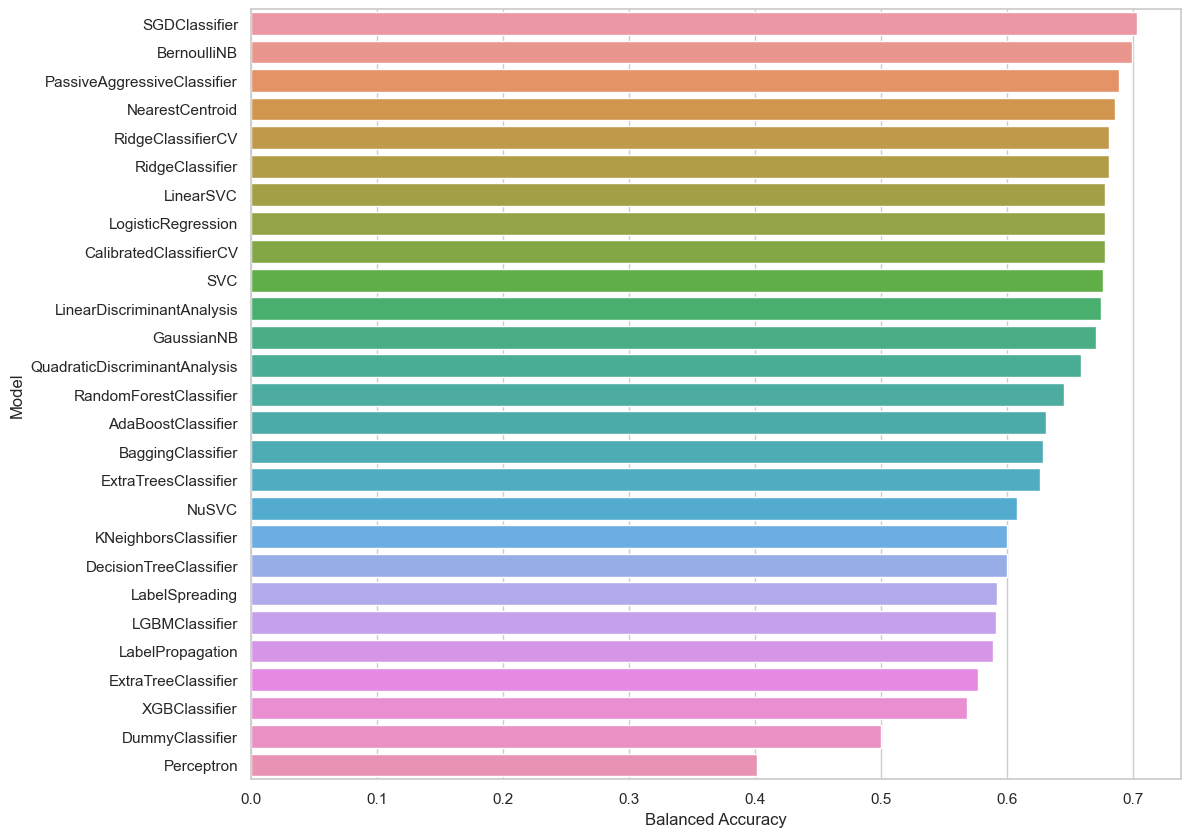

In [114]:
#Visualizando el mejor modelo
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Balanced Accuracy", data=predictions)